In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [3]:

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/AIML_Dataset.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [4]:
df.head()#afficher 4 premier


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info() #information de la dataset
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
pd.DataFrame({
    "isFraud": df["isFraud"].value_counts(),
    "isFlaggedFraud": df["isFlaggedFraud"].value_counts()
})



,isFraud,isFlaggedFraud
0,6354407,6362604
1,8213,16


In [ ]:
df["isFlaggedFraud"].value_counts() #count of fraud and non-fraud cases

,count
isFlaggedFraud,
0,6362604
1,16


In [8]:
print("nombre de null : ",df.isnull().sum().sum()) #checking for null values in the dataset

nombre de null :  0


In [ ]:
df.shape

(6362620, 11)

In [11]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100,2 )#percentage of fraud cases in the dataset

np.float64(0.13)

Text(0, 0.5, 'Nombre de transactions')

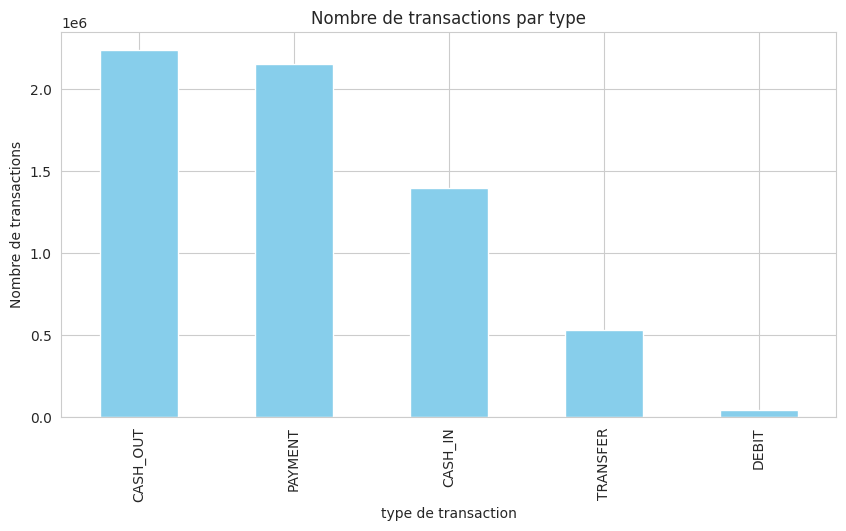

In [ ]:
df['type'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue',title='Nombre de transactions par type')
plt.xlabel('type de transaction')
plt.ylabel('Nombre de transactions')

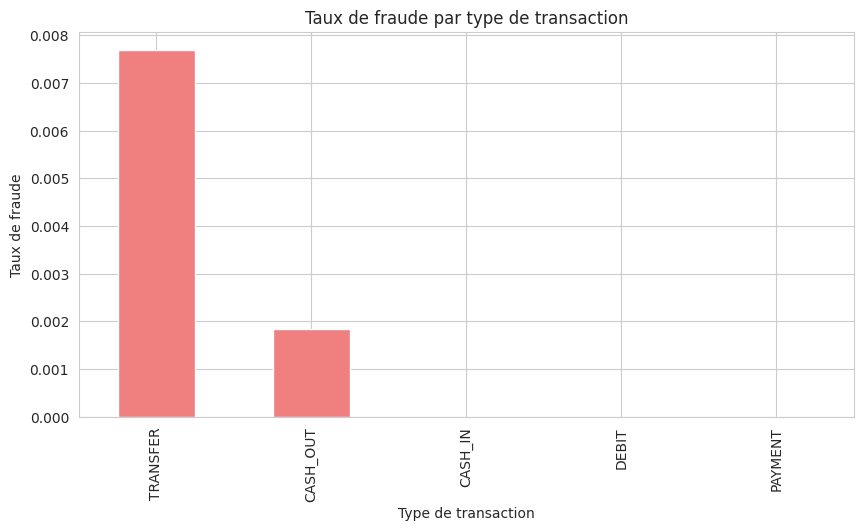

In [ ]:
fraud_types = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_types.plot(kind='bar', figsize=(10, 5), color='lightcoral', title='Taux de fraude par type de transaction')
plt.xlabel('Type de transaction')
plt.ylabel('Taux de fraude')
plt.show()

In [ ]:
df['amount'].describe().astype(int) #resume statistique de la colonne montant

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


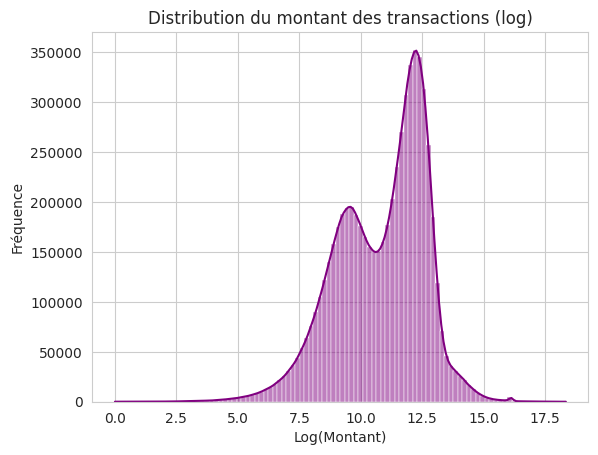

In [ ]:
sns.histplot(np.log1p(df['amount']), bins=100, kde=True, color='purple')
plt.title('Distribution du montant des transactions (log)')
plt.xlabel('Log(Montant)')
plt.ylabel('Fréquence')
plt.show()

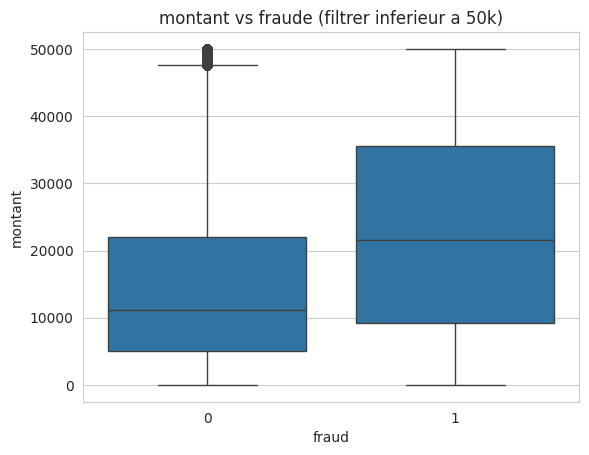

In [ ]:
sns.boxplot(data= df[df['amount'] < 50000] , x="isFraud" , y="amount")
plt.xlabel('fraud')
plt.ylabel('montant')
plt.title('montant vs fraude (filtrer inferieur a 50k)')
plt.show()

In [12]:
df["balanceDifOrig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDifDest"]=df["newbalanceDest"]-df["oldbalanceDest"]

In [18]:
(df["balanceDifOrig"] < 0).sum()

np.int64(6362620)

In [ ]:
(df["balanceDifDest"] < 0).sum()

np.int64(1238864)

In [20]:
top_senders = df["nameOrig"].value_counts().head(10)
top_receivers = df["nameDest"].value_counts().head(10)

In [23]:
top_senders
top_receivers


,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C1789550256,99
C451111351,99
C1360767589,98


In [ ]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)
fraud_users

,count
nameOrig,
C1280323807,1
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C1039979813,1
C2089752665,1
C1614818636,1
C40604503,1


In [25]:
fraud_types=df[df["type"].isin(["CASH_OUT","TRANSFER"])]
fraud_types.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifOrig,balanceDifDest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


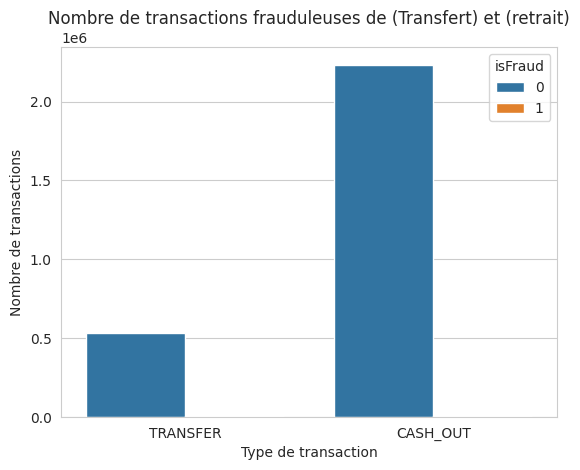

In [26]:
sns.countplot(data=fraud_types,x="type" , hue="isFraud")
plt.title("Nombre de transactions frauduleuses de (Transfert) et (retrait)")
plt.xlabel("Type de transaction")
plt.ylabel("Nombre de transactions")
plt.show()


In [ ]:
corr= df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

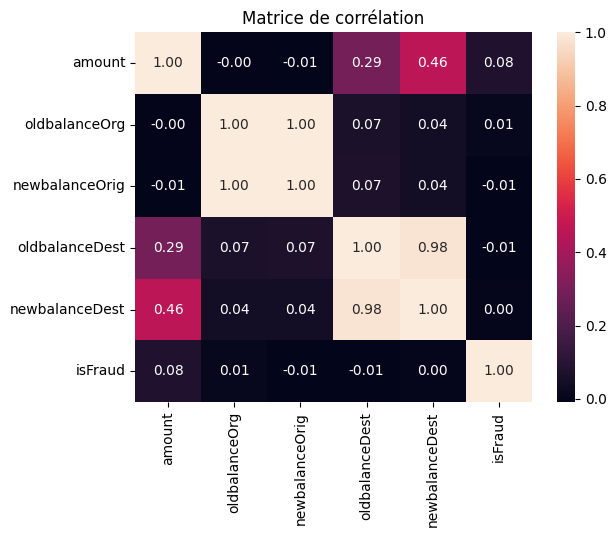

In [ ]:
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title("Matrice de corrélation")
plt.show

In [ ]:
zero_after_transfer=df[
    (df["newbalanceOrig"]>0) &
    (df["newbalanceDest"]==0) &
    (df["type"].isin( ["TRANSFER","CASH_OUT"]))
    ]
zero_after_transfer.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifOrig,balanceDiffDest,balanceDifDest
70,1,CASH_OUT,47458.86,C527211736,209534.84,162075.98,C2096057945,52120.00,0.0,0,0,47458.86,-52120.00,-52120.00
71,1,CASH_OUT,136872.92,C1533123860,162075.98,25203.05,C766572210,217806.00,0.0,0,0,136872.93,-217806.00,-217806.00
789,1,TRANSFER,32132.45,C2116299597,62491.91,30359.46,C1466073198,59605.00,0.0,0,0,32132.45,-59605.00,-59605.00
1427,1,TRANSFER,9533.48,C61304908,13056.00,3522.52,C800281454,888.00,0.0,0,0,9533.48,-888.00,-888.00
1979,1,CASH_OUT,144659.77,C1936375962,149735.97,149735.97,C757108857,149735.97,0.0,0,0,0.00,-149735.97,-149735.97


In [ ]:
df["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  balanceDifOrig  float64
 12  balanceDifDest  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 631.1+ MB


In [36]:
zero_i=df[
    (df["isFraud"]==1) &
    (df["isFlaggedFraud"]==0) &
    (df["type"].isin( ["TRANSFER","CASH_OUT"]))
    ]
zero_i.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifOrig,balanceDifDest
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,181.0,0.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,181.0,-21182.0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,2806.0,0.0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0,2806.0,-26202.0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,20128.0,0.0


In [79]:

counts = df["nameOrig"].value_counts()


for i in range(1, 4):
  names_with_3 = counts[counts == i].index


  df1 = df[df["nameOrig"].isin(names_with_3)].count("")
  print("le nombre de personne avec ", i ," transaction",df1)



le nombre de personne avec  1  transaction step              6344009
type              6344009
amount            6344009
nameOrig          6344009
oldbalanceOrg     6344009
newbalanceOrig    6344009
nameDest          6344009
oldbalanceDest    6344009
newbalanceDest    6344009
isFraud           6344009
isFlaggedFraud    6344009
balanceDifOrig    6344009
balanceDifDest    6344009
dtype: int64
le nombre de personne avec  2  transaction step              18566
type              18566
amount            18566
nameOrig          18566
oldbalanceOrg     18566
newbalanceOrig    18566
nameDest          18566
oldbalanceDest    18566
newbalanceDest    18566
isFraud           18566
isFlaggedFraud    18566
balanceDifOrig    18566
balanceDifDest    18566
dtype: int64
le nombre de personne avec  3  transaction step              45
type              45
amount            45
nameOrig          45
oldbalanceOrg     45
newbalanceOrig    45
nameDest          45
oldbalanceDest    45
newbalanceDest    45
isFrau

ingenieurie de donnes et entrainement de donnes

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [39]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifOrig,balanceDifDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [40]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis=1)
df_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDifOrig,balanceDifDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [41]:
categorical=["type"]
numerical=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]
y=df_model['isFraud']
z=df_model.drop("isFraud",axis=1)



In [47]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifOrig,balanceDifDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,-21182.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13,339682.13
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,850002.52,0.00


In [43]:
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=42) #test entrainement divise

In [42]:
prepocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numerical),
        ("cat",OneHotEncoder(),categorical)
    ],
    remainder="drop"
)


In [44]:
pipeline=Pipeline([
    ("prepocessor",prepocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
])
pipeline.fit(X_train,y_train)


Pipeline(steps=[('prepocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OneHotEncoder(),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [45]:
y_pred=pipeline.predict(X_test)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270904
           1       0.02      0.94      0.04      1620

    accuracy                           0.95   1272524
   macro avg       0.51      0.94      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



array([[1202458,   68446],
       [    102,    1518]])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  balanceDifOrig  float64
 12  balanceDifDest  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 631.1+ MB
